<a href="https://colab.research.google.com/github/Malaika-05/AI-Training/blob/main/Week02_02_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Admission.csv')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [6]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00


In [7]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 149.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = df['Chance of Admit ']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)        # Train model
y_pred_lin = lin_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))

Linear Regression R²: 0.8212082591486993


In [14]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)          # Regularization to avoid overfitting
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))

Ridge Regression R²: 0.8204337208459432


In [15]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)          # Can ignore less important features
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))

Lasso Regression R²: 0.6600226299368059


In [16]:
print("\nComparison of R² scores:")
print("Linear Regression:", r2_score(y_test, y_pred_lin))
print("Ridge Regression :", r2_score(y_test, y_pred_ridge))
print("Lasso Regression :", r2_score(y_test, y_pred_lasso))


Comparison of R² scores:
Linear Regression: 0.8212082591486993
Ridge Regression : 0.8204337208459432
Lasso Regression : 0.6600226299368059


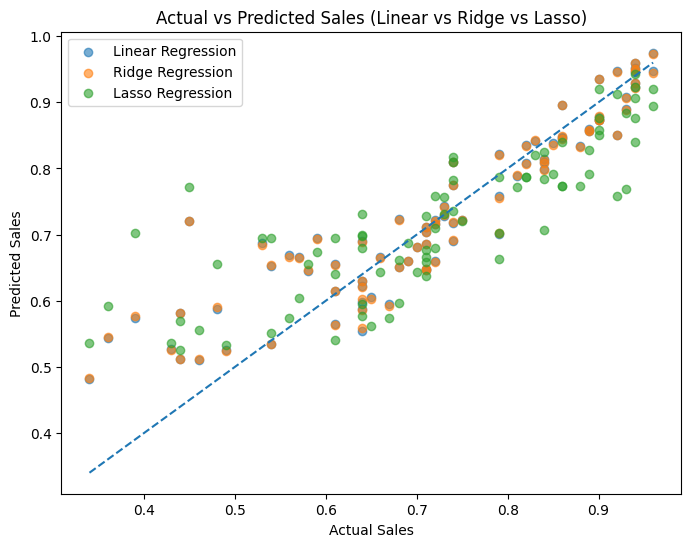

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plots for each model
plt.scatter(y_test, y_pred_lin, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label="Lasso Regression")

# Perfect prediction reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear vs Ridge vs Lasso)")
plt.legend()
plt.show()
